<a href="https://colab.research.google.com/github/abhigoogol/Autoencoders-using-Pytorch/blob/master/04_Sparse_Autoencoder_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Function

import torchvision
from torchvision import transforms

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import copy
import random
from tqdm import tqdm_notebook

plt.style.use('default')

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
bs = 1000
traindataset = torchvision.datasets.MNIST(root='./MNIST', download=True, train=True, transform=transform)
trainloader = DataLoader(traindataset, shuffle=True, batch_size=bs, num_workers=4)

testdataset = torchvision.datasets.MNIST(root='./MNIST', download=True, train=False, transform=transform)
testloader = DataLoader(testdataset, shuffle=False, batch_size=bs, num_workers=4)

In [3]:
GPU = 0
if torch.cuda.is_available():
  print('GPU available!')
  GPU = 1

GPU available!


In [0]:
 def imshow(img, title=None):
#     img = img / 2 + 0.5     # unnormalize
  npimg = img.cpu().detach().numpy()
  plt.title(title)
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# print(images.shape, labels.shape)

# # show images
# imshow(torchvision.utils.make_grid(images))
# imshow(torchvision.utils.make_grid(labels))

In [0]:
class L1Penality(torch.autograd.Function):
  
  """
  In the forward pass we receive a Tensor containing the input and return
  a Tensor containing the output. ctx is a context object that can be used
  to stash information for backward computation. You can cache arbitrary
  objects for use in the backward pass using the ctx.save_for_backward method.
  """
  @staticmethod
  def forward(ctx, input, l1weight):
    ctx.save_for_backward(input)
    ctx.l1weight = l1weight
    return input
  
  """
  In the backward pass we receive a Tensor containing the gradient of the loss
  with respect to the output, and we need to compute the gradient of the loss
  with respect to the input.
  """
  @staticmethod
  def backward(ctx, grad_output):
    input, = ctx.saved_tensors
    grad_input = input.clone().sign().mul(ctx.l1weight)
    grad_input += grad_output
    return grad_input, None

In [6]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(nn.Linear(28*28, 400),
                           nn.Tanh())
    self.decoder = nn.Sequential(nn.Linear(400, 28*28),
                           nn.Sigmoid())
  
  def forward(self, x):
    x = self.encoder(x)
    x = L1Penality.apply(x, 0.1)  # 10% of the weights are supposed to be zero
    x = self.decoder(x)
    return x
    
net = Autoencoder()
print(net)

if GPU:
  net = net.cuda()

init_weightsE = copy.deepcopy(net.encoder[0].weight.data)
init_weightsD = copy.deepcopy(net.decoder[0].weight.data)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=400, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


# Optimization Technique

In [0]:
criterion = nn.MSELoss()
lr = 0.98

# Train Autoencoder

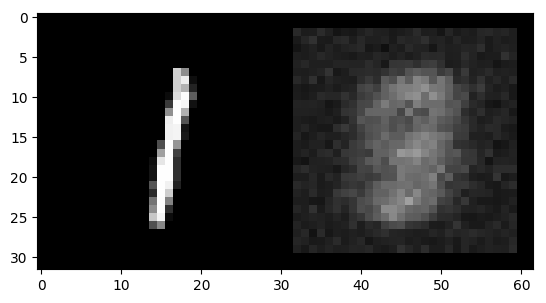

Epoch: 1/400 	 Mean Square Error Loss: 0.10807406430443128
Epoch: 2/400 	 Mean Square Error Loss: 0.07112951663633188
Epoch: 3/400 	 Mean Square Error Loss: 0.06793409995734692
Epoch: 4/400 	 Mean Square Error Loss: 0.0662687674164772
Epoch: 5/400 	 Mean Square Error Loss: 0.06517687973876794


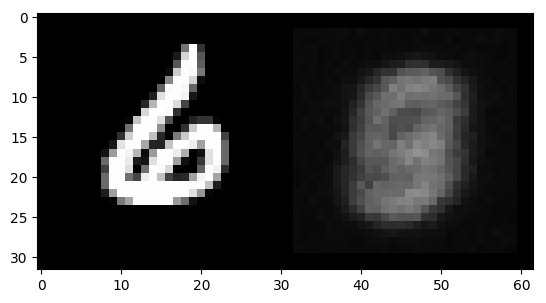

Epoch: 6/400 	 Mean Square Error Loss: 0.0643059362967809
Epoch: 7/400 	 Mean Square Error Loss: 0.06359421275556087
Epoch: 8/400 	 Mean Square Error Loss: 0.06280662138015032
Epoch: 9/400 	 Mean Square Error Loss: 0.06230408512055874
Epoch: 10/400 	 Mean Square Error Loss: 0.06182445039351781


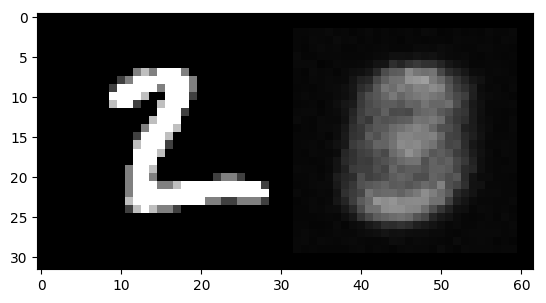

Epoch: 11/400 	 Mean Square Error Loss: 0.06131351341803869
Epoch: 12/400 	 Mean Square Error Loss: 0.06066025340308746
Epoch: 13/400 	 Mean Square Error Loss: 0.060297535235683125
Epoch: 14/400 	 Mean Square Error Loss: 0.05965068054695924
Epoch: 15/400 	 Mean Square Error Loss: 0.05914830459902684


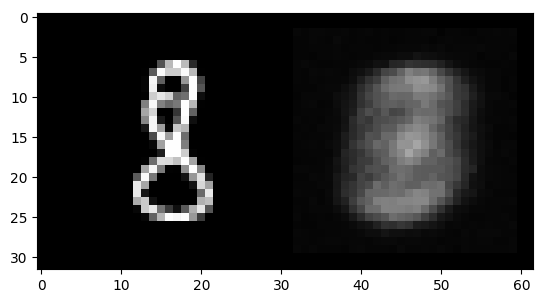

Epoch: 16/400 	 Mean Square Error Loss: 0.05880691738178333
Epoch: 17/400 	 Mean Square Error Loss: 0.05876056787868341
Epoch: 18/400 	 Mean Square Error Loss: 0.05847784001380205
Epoch: 19/400 	 Mean Square Error Loss: 0.05847716989616553
Epoch: 20/400 	 Mean Square Error Loss: 0.05878091690440972


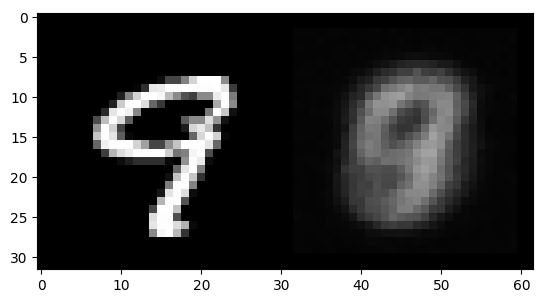

Epoch: 21/400 	 Mean Square Error Loss: 0.05860753872742255
Epoch: 22/400 	 Mean Square Error Loss: 0.058264356168607874
Epoch: 23/400 	 Mean Square Error Loss: 0.05803184242298206
Epoch: 24/400 	 Mean Square Error Loss: 0.05781475168963273
Epoch: 25/400 	 Mean Square Error Loss: 0.05752573516219854


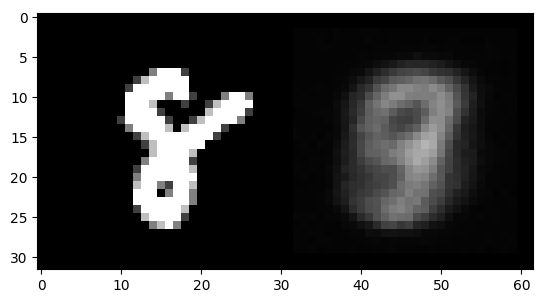

Epoch: 26/400 	 Mean Square Error Loss: 0.05734104085713625
Epoch: 27/400 	 Mean Square Error Loss: 0.05720859660456578
Epoch: 28/400 	 Mean Square Error Loss: 0.05690705000112454
Epoch: 29/400 	 Mean Square Error Loss: 0.056711318468054134
Epoch: 30/400 	 Mean Square Error Loss: 0.056680083336929483


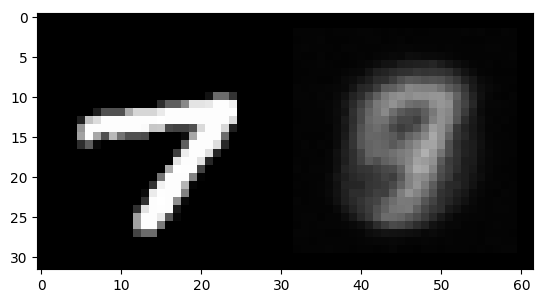

Epoch: 31/400 	 Mean Square Error Loss: 0.05630951076745987
Epoch: 32/400 	 Mean Square Error Loss: 0.05585356969386339
Epoch: 33/400 	 Mean Square Error Loss: 0.055935397557914254
Epoch: 34/400 	 Mean Square Error Loss: 0.05602350011467934
Epoch: 35/400 	 Mean Square Error Loss: 0.05583124551922083


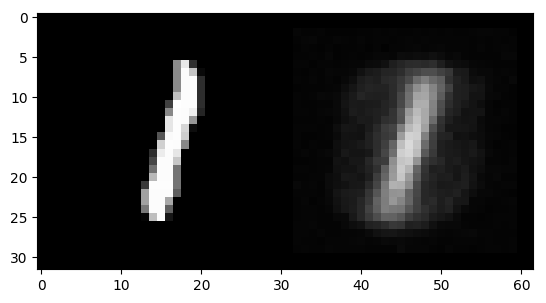

Epoch: 36/400 	 Mean Square Error Loss: 0.0557122224320968
Epoch: 37/400 	 Mean Square Error Loss: 0.05572665091603994
Epoch: 38/400 	 Mean Square Error Loss: 0.05593756157904863
Epoch: 39/400 	 Mean Square Error Loss: 0.056194684778650604
Epoch: 40/400 	 Mean Square Error Loss: 0.05620899349451065


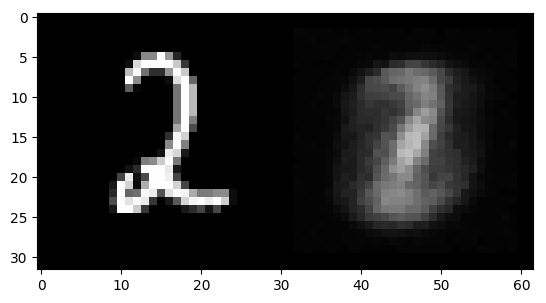

Epoch: 41/400 	 Mean Square Error Loss: 0.055899389833211896
Epoch: 42/400 	 Mean Square Error Loss: 0.05532250069081783
Epoch: 43/400 	 Mean Square Error Loss: 0.05528392965594928
Epoch: 44/400 	 Mean Square Error Loss: 0.05549891553819179
Epoch: 45/400 	 Mean Square Error Loss: 0.055527498945593834


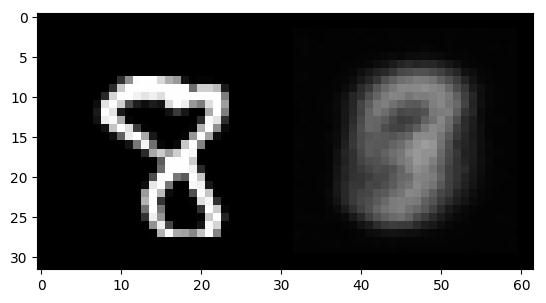

Epoch: 46/400 	 Mean Square Error Loss: 0.05558207922925552
Epoch: 47/400 	 Mean Square Error Loss: 0.05596296712756157
Epoch: 48/400 	 Mean Square Error Loss: 0.05633088797330856
Epoch: 49/400 	 Mean Square Error Loss: 0.0564118322605888
Epoch: 50/400 	 Mean Square Error Loss: 0.05604633217056592


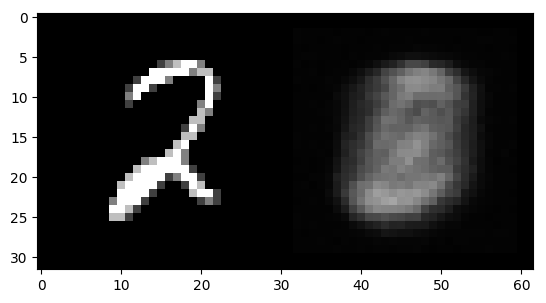

Epoch: 51/400 	 Mean Square Error Loss: 0.055850490120549996
Epoch: 52/400 	 Mean Square Error Loss: 0.055728568136692046
Epoch: 53/400 	 Mean Square Error Loss: 0.055724043399095535
Epoch: 54/400 	 Mean Square Error Loss: 0.0553411158422629
Epoch: 55/400 	 Mean Square Error Loss: 0.055249672196805474


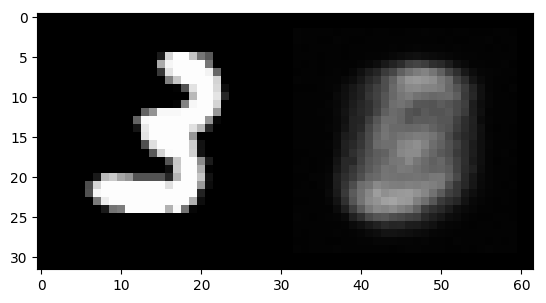

Epoch: 56/400 	 Mean Square Error Loss: 0.055026572880645594
Epoch: 57/400 	 Mean Square Error Loss: 0.055042836194237076
Epoch: 58/400 	 Mean Square Error Loss: 0.05475058952967326
Epoch: 59/400 	 Mean Square Error Loss: 0.05481758732348681
Epoch: 60/400 	 Mean Square Error Loss: 0.054744719962279004


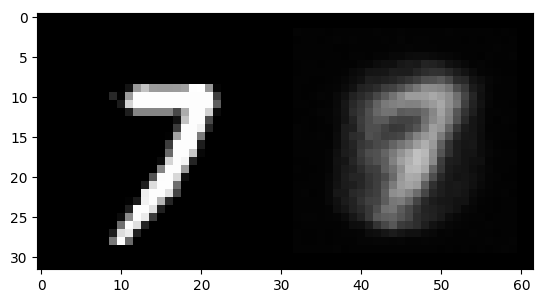

Epoch: 61/400 	 Mean Square Error Loss: 0.05463454928249121
Epoch: 62/400 	 Mean Square Error Loss: 0.054681358548502125
Epoch: 63/400 	 Mean Square Error Loss: 0.054450823552906515
Epoch: 64/400 	 Mean Square Error Loss: 0.05419755720843871
Epoch: 65/400 	 Mean Square Error Loss: 0.05409052434066931


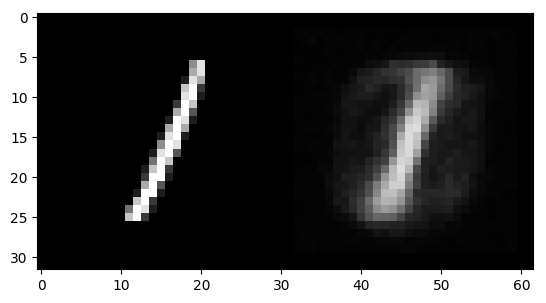

Epoch: 66/400 	 Mean Square Error Loss: 0.053983839725454646
Epoch: 67/400 	 Mean Square Error Loss: 0.05424911609540383
Epoch: 68/400 	 Mean Square Error Loss: 0.054464532807469365
Epoch: 69/400 	 Mean Square Error Loss: 0.054353731622298555
Epoch: 70/400 	 Mean Square Error Loss: 0.054056712053716184


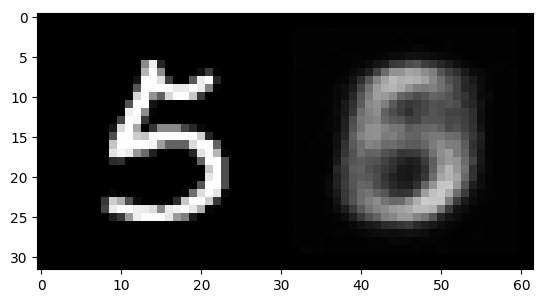

Epoch: 71/400 	 Mean Square Error Loss: 0.05379736137886842
Epoch: 72/400 	 Mean Square Error Loss: 0.05367060992866755
Epoch: 73/400 	 Mean Square Error Loss: 0.05355824381113052
Epoch: 74/400 	 Mean Square Error Loss: 0.053606525311867395
Epoch: 75/400 	 Mean Square Error Loss: 0.05369846901545922


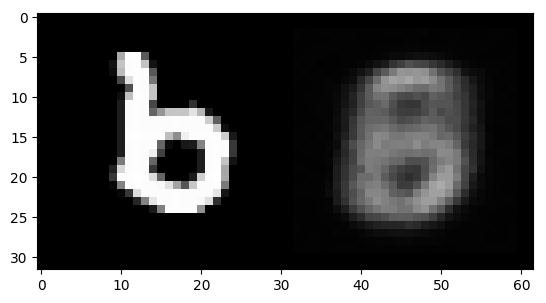

Epoch: 76/400 	 Mean Square Error Loss: 0.053444654246171314
Epoch: 77/400 	 Mean Square Error Loss: 0.05337374322116375
Epoch: 78/400 	 Mean Square Error Loss: 0.05330833631257216
Epoch: 79/400 	 Mean Square Error Loss: 0.05344767924398184
Epoch: 80/400 	 Mean Square Error Loss: 0.053405207395553586


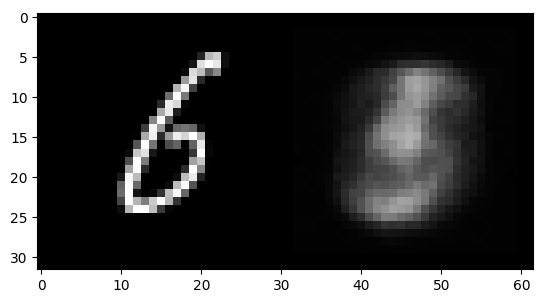

Epoch: 81/400 	 Mean Square Error Loss: 0.053117446166773635
Epoch: 82/400 	 Mean Square Error Loss: 0.05283323706438144
Epoch: 83/400 	 Mean Square Error Loss: 0.05270472168922424
Epoch: 84/400 	 Mean Square Error Loss: 0.05287829482307037
Epoch: 85/400 	 Mean Square Error Loss: 0.05297134555876255


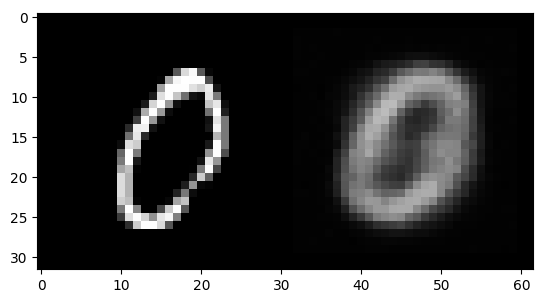

Epoch: 86/400 	 Mean Square Error Loss: 0.05313182796041171
Epoch: 87/400 	 Mean Square Error Loss: 0.05342549749960502
Epoch: 88/400 	 Mean Square Error Loss: 0.05345220354696115
Epoch: 89/400 	 Mean Square Error Loss: 0.05330286299188932
Epoch: 90/400 	 Mean Square Error Loss: 0.05315765564640363


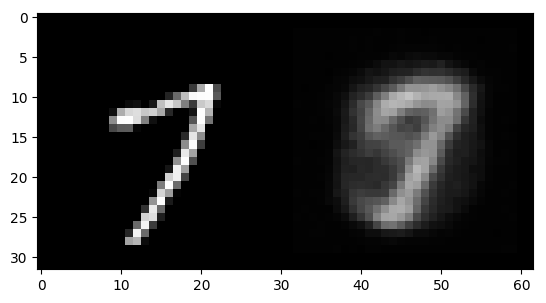

Epoch: 91/400 	 Mean Square Error Loss: 0.05308445387830337
Epoch: 92/400 	 Mean Square Error Loss: 0.053348398146529995
Epoch: 93/400 	 Mean Square Error Loss: 0.05358085539191961
Epoch: 94/400 	 Mean Square Error Loss: 0.05358921053508917
Epoch: 95/400 	 Mean Square Error Loss: 0.053407697627941765


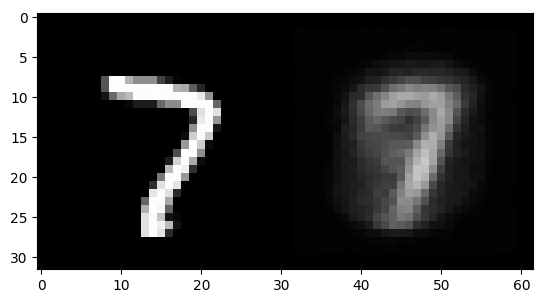

Epoch: 96/400 	 Mean Square Error Loss: 0.05324688603480657
Epoch: 97/400 	 Mean Square Error Loss: 0.05306236979862054
Epoch: 98/400 	 Mean Square Error Loss: 0.05271332245320082
Epoch: 99/400 	 Mean Square Error Loss: 0.05263255499303341
Epoch: 100/400 	 Mean Square Error Loss: 0.05300970741858085


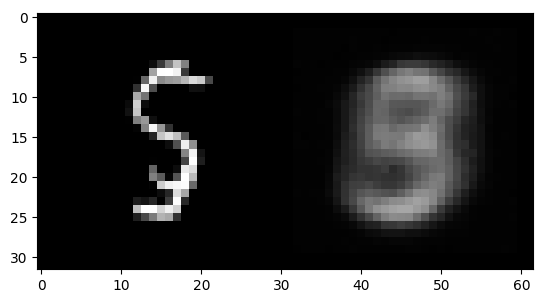

Epoch: 101/400 	 Mean Square Error Loss: 0.053085890909036
Epoch: 102/400 	 Mean Square Error Loss: 0.053091406201322876
Epoch: 103/400 	 Mean Square Error Loss: 0.05273587976892789
Epoch: 104/400 	 Mean Square Error Loss: 0.052515800669789316
Epoch: 105/400 	 Mean Square Error Loss: 0.052809773075083895


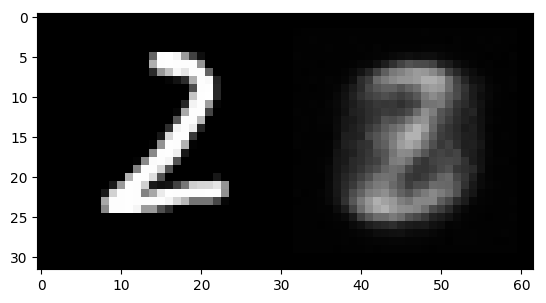

Epoch: 106/400 	 Mean Square Error Loss: 0.05307245248307784
Epoch: 107/400 	 Mean Square Error Loss: 0.05311041213572025
Epoch: 108/400 	 Mean Square Error Loss: 0.053000716989239055
Epoch: 109/400 	 Mean Square Error Loss: 0.05278743083278338
Epoch: 110/400 	 Mean Square Error Loss: 0.052728846110403536


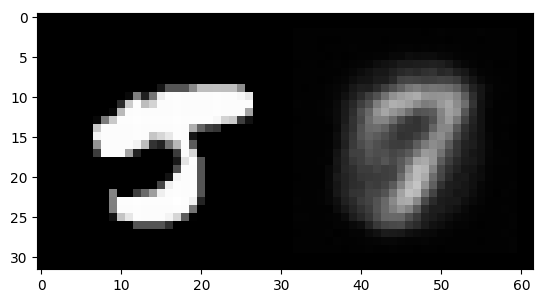

Epoch: 111/400 	 Mean Square Error Loss: 0.052937285788357255
Epoch: 112/400 	 Mean Square Error Loss: 0.05246831327676773
Epoch: 113/400 	 Mean Square Error Loss: 0.05230049000432094
Epoch: 114/400 	 Mean Square Error Loss: 0.05228630484392246
Epoch: 115/400 	 Mean Square Error Loss: 0.05188517514616251


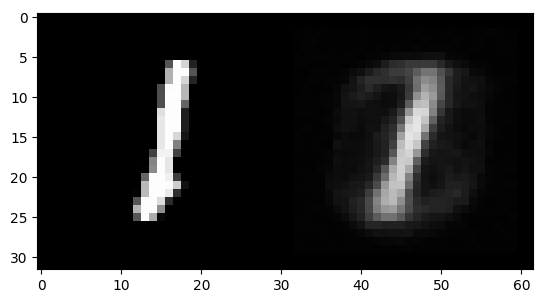

Epoch: 116/400 	 Mean Square Error Loss: 0.05185575528691212
Epoch: 117/400 	 Mean Square Error Loss: 0.051977366271118326
Epoch: 118/400 	 Mean Square Error Loss: 0.05172648833443721
Epoch: 119/400 	 Mean Square Error Loss: 0.05159863959997892
Epoch: 120/400 	 Mean Square Error Loss: 0.05168491769582033


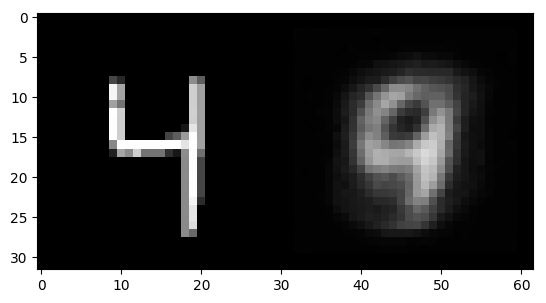

Epoch: 121/400 	 Mean Square Error Loss: 0.05163217255224784
Epoch: 122/400 	 Mean Square Error Loss: 0.051462622731924056
Epoch: 123/400 	 Mean Square Error Loss: 0.051196064924200375
Epoch: 124/400 	 Mean Square Error Loss: 0.051061171231170495
Epoch: 125/400 	 Mean Square Error Loss: 0.05095568373799324


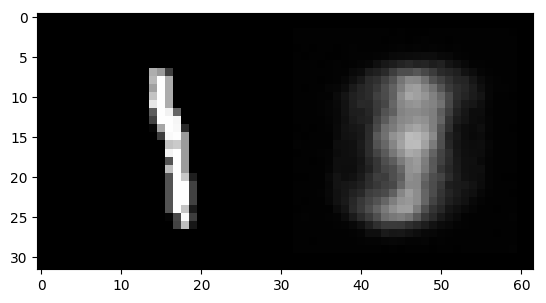

Epoch: 126/400 	 Mean Square Error Loss: 0.05091690259675185
Epoch: 127/400 	 Mean Square Error Loss: 0.05065194896111886
Epoch: 128/400 	 Mean Square Error Loss: 0.05072984267026186
Epoch: 129/400 	 Mean Square Error Loss: 0.05053203900655111
Epoch: 130/400 	 Mean Square Error Loss: 0.05033801936854919


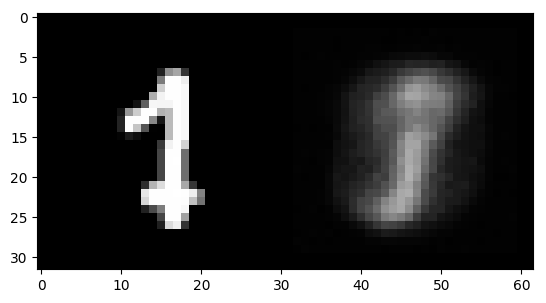

Epoch: 131/400 	 Mean Square Error Loss: 0.050264654743174715
Epoch: 132/400 	 Mean Square Error Loss: 0.050566320804258186
Epoch: 133/400 	 Mean Square Error Loss: 0.05060791975508134
Epoch: 134/400 	 Mean Square Error Loss: 0.05072204048434893
Epoch: 135/400 	 Mean Square Error Loss: 0.05065909295032422


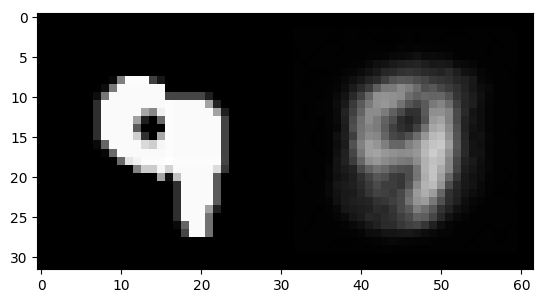

Epoch: 136/400 	 Mean Square Error Loss: 0.05094404052942991
Epoch: 137/400 	 Mean Square Error Loss: 0.050965346458057566
Epoch: 138/400 	 Mean Square Error Loss: 0.05096791430066029
Epoch: 139/400 	 Mean Square Error Loss: 0.050931559130549434
Epoch: 140/400 	 Mean Square Error Loss: 0.05064798928797245


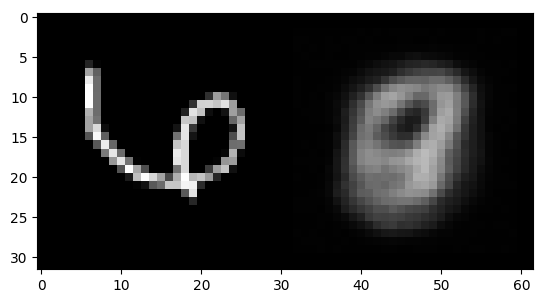

Epoch: 141/400 	 Mean Square Error Loss: 0.050505289311210316
Epoch: 142/400 	 Mean Square Error Loss: 0.050654659730692705
Epoch: 143/400 	 Mean Square Error Loss: 0.0505282049998641
Epoch: 144/400 	 Mean Square Error Loss: 0.0505639398470521
Epoch: 145/400 	 Mean Square Error Loss: 0.05046552022298177


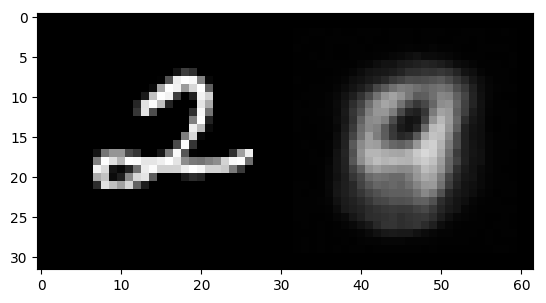

Epoch: 146/400 	 Mean Square Error Loss: 0.050261641914645834
Epoch: 147/400 	 Mean Square Error Loss: 0.04990574556092421
Epoch: 148/400 	 Mean Square Error Loss: 0.049926516910394035
Epoch: 149/400 	 Mean Square Error Loss: 0.04999379925429821
Epoch: 150/400 	 Mean Square Error Loss: 0.05029968383411566


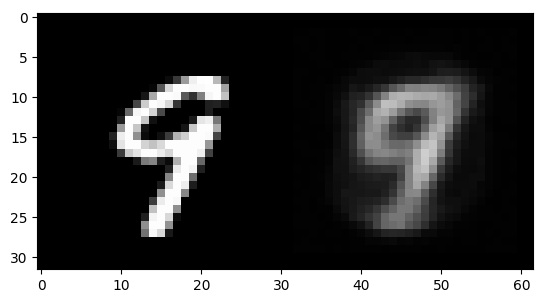

Epoch: 151/400 	 Mean Square Error Loss: 0.05023467093706131
Epoch: 152/400 	 Mean Square Error Loss: 0.05012509313722451
Epoch: 153/400 	 Mean Square Error Loss: 0.05031565216680368
Epoch: 154/400 	 Mean Square Error Loss: 0.050275370478630066
Epoch: 155/400 	 Mean Square Error Loss: 0.05045573264360428


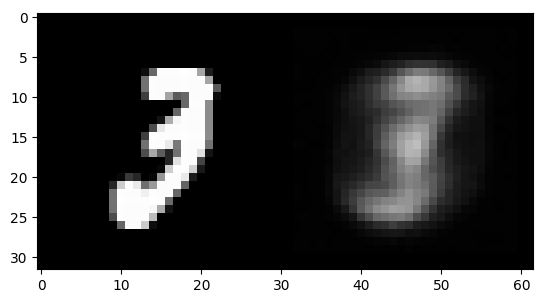

Epoch: 156/400 	 Mean Square Error Loss: 0.050324949373801546
Epoch: 157/400 	 Mean Square Error Loss: 0.050205385933319725
Epoch: 158/400 	 Mean Square Error Loss: 0.05009781420230865
Epoch: 159/400 	 Mean Square Error Loss: 0.04988685231655836
Epoch: 160/400 	 Mean Square Error Loss: 0.05012830638637145


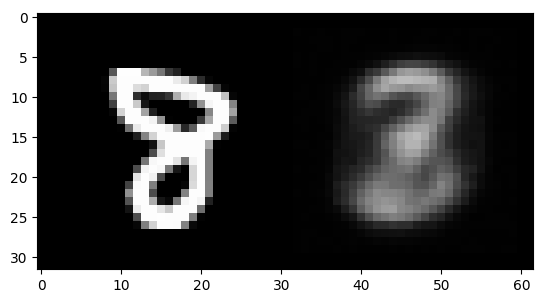

Epoch: 161/400 	 Mean Square Error Loss: 0.05005322191864252
Epoch: 162/400 	 Mean Square Error Loss: 0.04995874880502622
Epoch: 163/400 	 Mean Square Error Loss: 0.05004001948982477
Epoch: 164/400 	 Mean Square Error Loss: 0.05014105079074701
Epoch: 165/400 	 Mean Square Error Loss: 0.050033932800094286


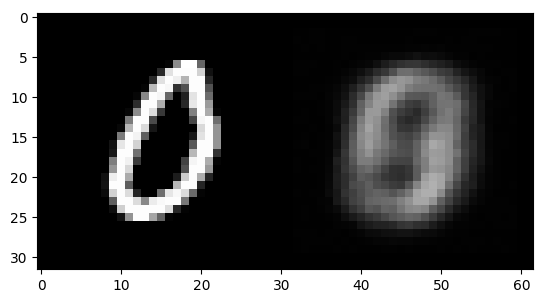

Epoch: 166/400 	 Mean Square Error Loss: 0.05014070086181164
Epoch: 167/400 	 Mean Square Error Loss: 0.05019994011769692
Epoch: 168/400 	 Mean Square Error Loss: 0.050245569584270316
Epoch: 169/400 	 Mean Square Error Loss: 0.05023131507138411
Epoch: 170/400 	 Mean Square Error Loss: 0.05025346279144287


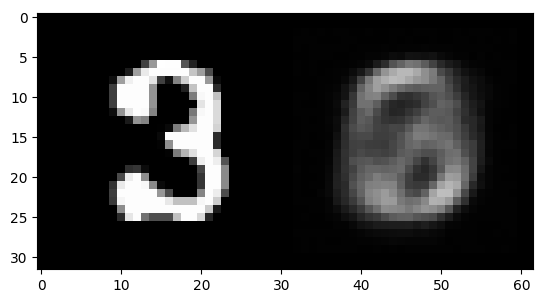

Epoch: 171/400 	 Mean Square Error Loss: 0.050287578627467154
Epoch: 172/400 	 Mean Square Error Loss: 0.05041459413866202
Epoch: 173/400 	 Mean Square Error Loss: 0.050457483157515526
Epoch: 174/400 	 Mean Square Error Loss: 0.05021846766273181
Epoch: 175/400 	 Mean Square Error Loss: 0.05023015545060237


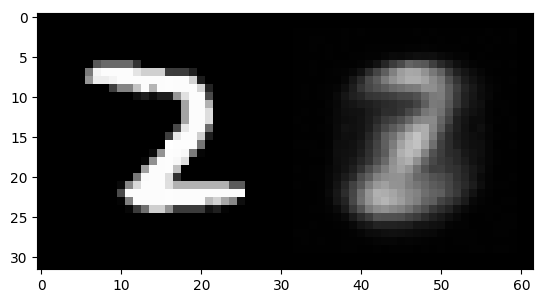

Epoch: 176/400 	 Mean Square Error Loss: 0.05012496449053287
Epoch: 177/400 	 Mean Square Error Loss: 0.050242223466436066
Epoch: 178/400 	 Mean Square Error Loss: 0.05039862785488367
Epoch: 179/400 	 Mean Square Error Loss: 0.05051259696483612
Epoch: 180/400 	 Mean Square Error Loss: 0.050590091943740846


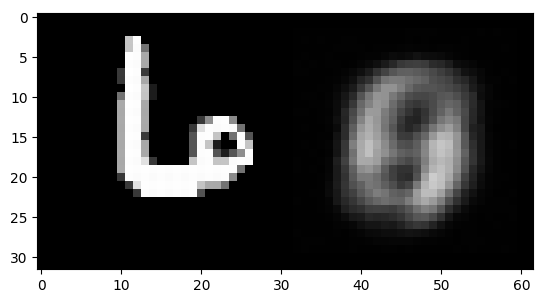

Epoch: 181/400 	 Mean Square Error Loss: 0.05062093132485946
Epoch: 182/400 	 Mean Square Error Loss: 0.050438958282272024
Epoch: 183/400 	 Mean Square Error Loss: 0.050273925562699634
Epoch: 184/400 	 Mean Square Error Loss: 0.05008301585912704
Epoch: 185/400 	 Mean Square Error Loss: 0.049799093728264174


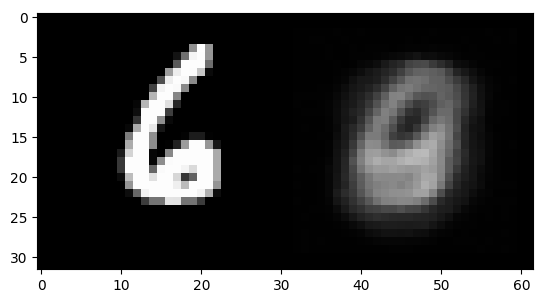

Epoch: 186/400 	 Mean Square Error Loss: 0.0499089727178216
Epoch: 187/400 	 Mean Square Error Loss: 0.049685536945859594
Epoch: 188/400 	 Mean Square Error Loss: 0.04974032485236724
Epoch: 189/400 	 Mean Square Error Loss: 0.049840348710616426
Epoch: 190/400 	 Mean Square Error Loss: 0.05001062999169032


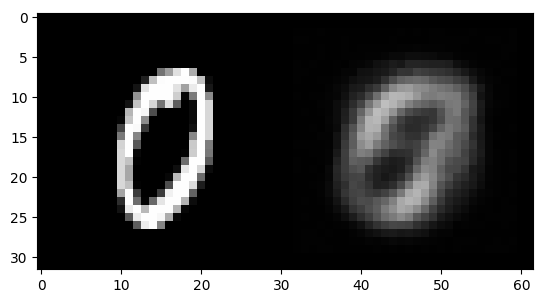

Epoch: 191/400 	 Mean Square Error Loss: 0.05023989857484897
Epoch: 192/400 	 Mean Square Error Loss: 0.050180437664190926
Epoch: 193/400 	 Mean Square Error Loss: 0.050530579313635825
Epoch: 194/400 	 Mean Square Error Loss: 0.0507293729732434
Epoch: 195/400 	 Mean Square Error Loss: 0.05100690331310034


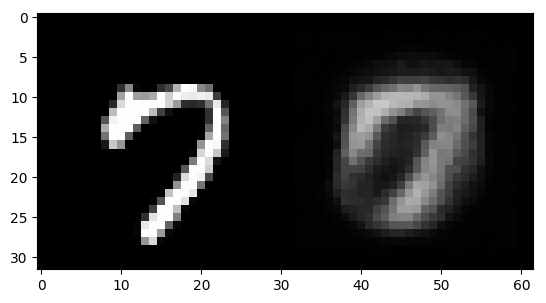

Epoch: 196/400 	 Mean Square Error Loss: 0.05122008466472228
Epoch: 197/400 	 Mean Square Error Loss: 0.051307127252221106
Epoch: 198/400 	 Mean Square Error Loss: 0.05096728162219127
Epoch: 199/400 	 Mean Square Error Loss: 0.05093938615173101
Epoch: 200/400 	 Mean Square Error Loss: 0.05102185998111963


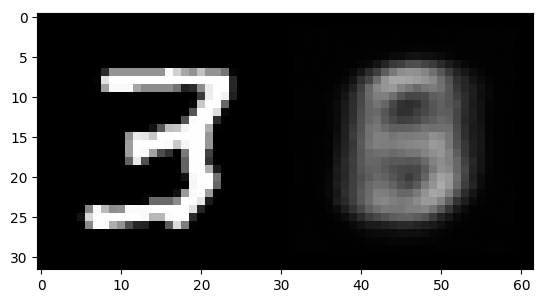

Epoch: 201/400 	 Mean Square Error Loss: 0.051038202146689096
Epoch: 202/400 	 Mean Square Error Loss: 0.05096789492915074
Epoch: 203/400 	 Mean Square Error Loss: 0.05064815046886603
Epoch: 204/400 	 Mean Square Error Loss: 0.050423978455364706
Epoch: 205/400 	 Mean Square Error Loss: 0.050425323533515136


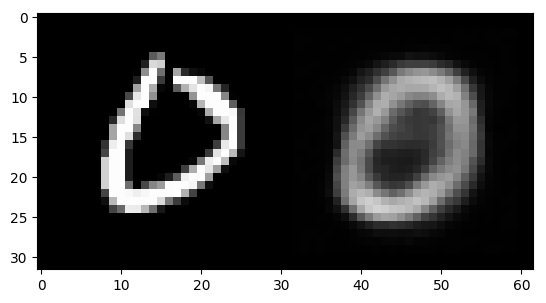

Epoch: 206/400 	 Mean Square Error Loss: 0.050637070586284
Epoch: 207/400 	 Mean Square Error Loss: 0.05060733898232381
Epoch: 208/400 	 Mean Square Error Loss: 0.050734546159704526
Epoch: 209/400 	 Mean Square Error Loss: 0.05081536546349526
Epoch: 210/400 	 Mean Square Error Loss: 0.051038033018509545


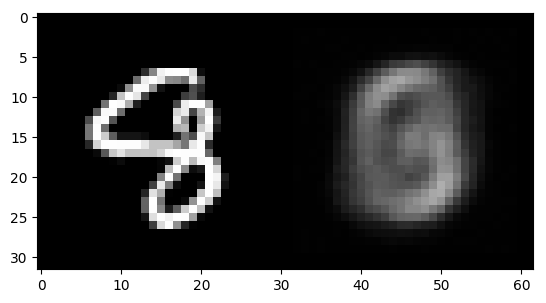

Epoch: 211/400 	 Mean Square Error Loss: 0.051072803574303785
Epoch: 212/400 	 Mean Square Error Loss: 0.051087384670972825
Epoch: 213/400 	 Mean Square Error Loss: 0.051193759342034656
Epoch: 214/400 	 Mean Square Error Loss: 0.05131926077107588
Epoch: 215/400 	 Mean Square Error Loss: 0.051252949175735314


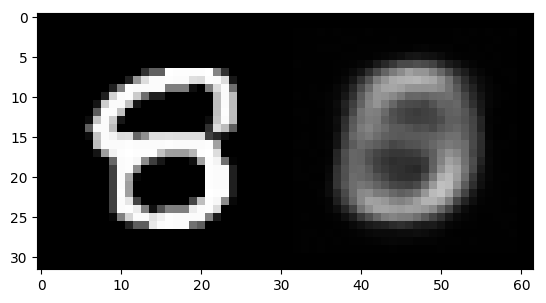

Epoch: 216/400 	 Mean Square Error Loss: 0.05149438660591841
Epoch: 217/400 	 Mean Square Error Loss: 0.051591356719533604
Epoch: 218/400 	 Mean Square Error Loss: 0.051709171508749326
Epoch: 219/400 	 Mean Square Error Loss: 0.05172688346356154
Epoch: 220/400 	 Mean Square Error Loss: 0.05157604639728864


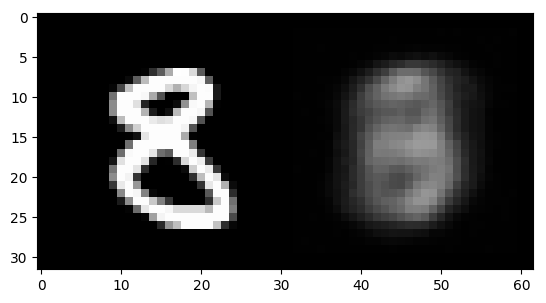

Epoch: 221/400 	 Mean Square Error Loss: 0.05146007978667815
Epoch: 222/400 	 Mean Square Error Loss: 0.05109478539476792
Epoch: 223/400 	 Mean Square Error Loss: 0.05083272326737642
Epoch: 224/400 	 Mean Square Error Loss: 0.05038911023487647
Epoch: 225/400 	 Mean Square Error Loss: 0.05047230540464322


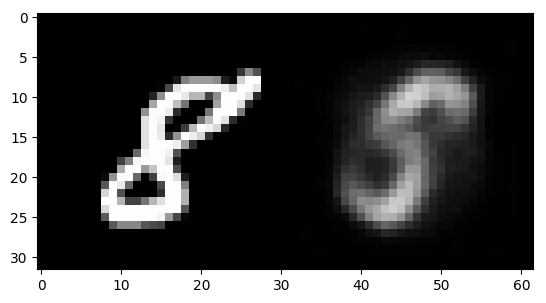

Epoch: 226/400 	 Mean Square Error Loss: 0.05041842348873615
Epoch: 227/400 	 Mean Square Error Loss: 0.05035355594009161
Epoch: 228/400 	 Mean Square Error Loss: 0.05045456190903982
Epoch: 229/400 	 Mean Square Error Loss: 0.05068761346240838
Epoch: 230/400 	 Mean Square Error Loss: 0.050830336039265


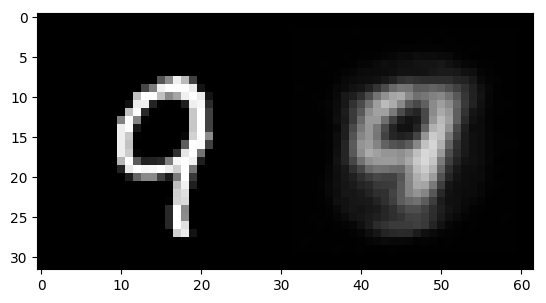

Epoch: 231/400 	 Mean Square Error Loss: 0.05070261309544245
Epoch: 232/400 	 Mean Square Error Loss: 0.05072349204371373
Epoch: 233/400 	 Mean Square Error Loss: 0.050892923523982364
Epoch: 234/400 	 Mean Square Error Loss: 0.05071045383810997
Epoch: 235/400 	 Mean Square Error Loss: 0.05076025612652302


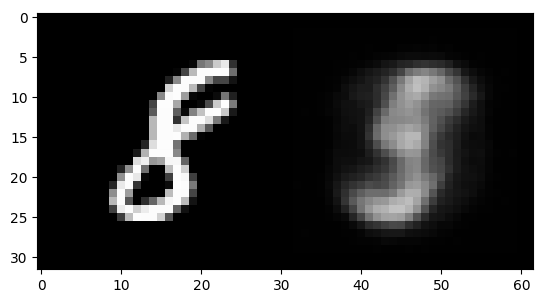

Epoch: 236/400 	 Mean Square Error Loss: 0.05059399406115214
Epoch: 237/400 	 Mean Square Error Loss: 0.05053774503370126
Epoch: 238/400 	 Mean Square Error Loss: 0.05017136856913566
Epoch: 239/400 	 Mean Square Error Loss: 0.049880116060376165
Epoch: 240/400 	 Mean Square Error Loss: 0.04989344278971354


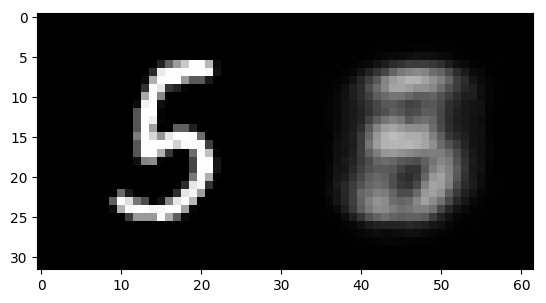

Epoch: 241/400 	 Mean Square Error Loss: 0.04975319541990757
Epoch: 242/400 	 Mean Square Error Loss: 0.049633619375526905
Epoch: 243/400 	 Mean Square Error Loss: 0.04950362561891476
Epoch: 244/400 	 Mean Square Error Loss: 0.04953497412304084
Epoch: 245/400 	 Mean Square Error Loss: 0.04928315319120884


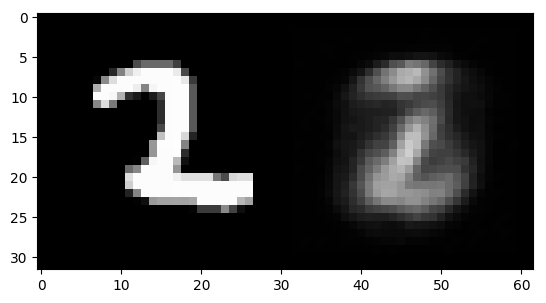

Epoch: 246/400 	 Mean Square Error Loss: 0.049494059880574544
Epoch: 247/400 	 Mean Square Error Loss: 0.04967495619008939
Epoch: 248/400 	 Mean Square Error Loss: 0.04985333749403556
Epoch: 249/400 	 Mean Square Error Loss: 0.04965387750416994
Epoch: 250/400 	 Mean Square Error Loss: 0.049685910902917386


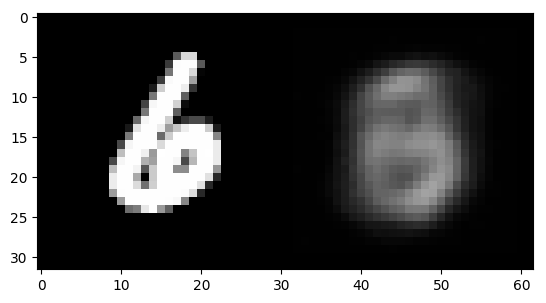

Epoch: 251/400 	 Mean Square Error Loss: 0.04960162279506524
Epoch: 252/400 	 Mean Square Error Loss: 0.049598916557927926
Epoch: 253/400 	 Mean Square Error Loss: 0.04939000954230626
Epoch: 254/400 	 Mean Square Error Loss: 0.04945576619356871
Epoch: 255/400 	 Mean Square Error Loss: 0.04929575820763906


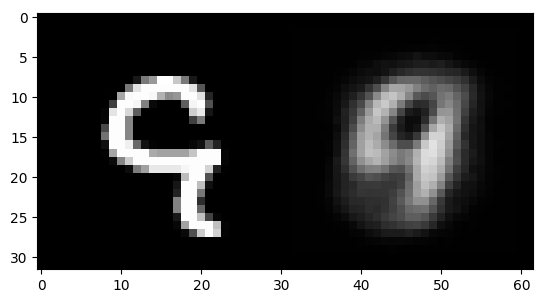

Epoch: 256/400 	 Mean Square Error Loss: 0.04929327002416054
Epoch: 257/400 	 Mean Square Error Loss: 0.04937142717341582
Epoch: 258/400 	 Mean Square Error Loss: 0.049399591982364655
Epoch: 259/400 	 Mean Square Error Loss: 0.04926580283790827
Epoch: 260/400 	 Mean Square Error Loss: 0.04938036787013213


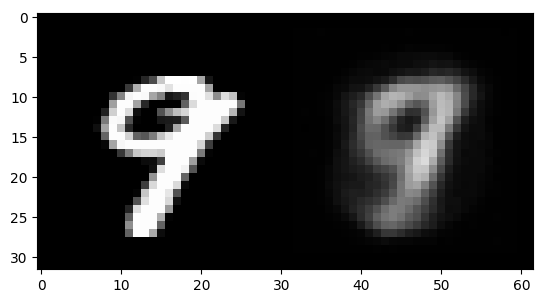

Epoch: 261/400 	 Mean Square Error Loss: 0.04973150075723728
Epoch: 262/400 	 Mean Square Error Loss: 0.04950449125220378
Epoch: 263/400 	 Mean Square Error Loss: 0.049250421859323976
Epoch: 264/400 	 Mean Square Error Loss: 0.04927624265352885
Epoch: 265/400 	 Mean Square Error Loss: 0.04918983895331621


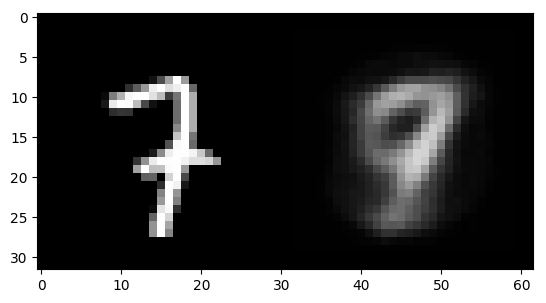

Epoch: 266/400 	 Mean Square Error Loss: 0.04924606774002314
Epoch: 267/400 	 Mean Square Error Loss: 0.04913243092596531
Epoch: 268/400 	 Mean Square Error Loss: 0.04895751128594081
Epoch: 269/400 	 Mean Square Error Loss: 0.04920681777099768
Epoch: 270/400 	 Mean Square Error Loss: 0.04896544485042493


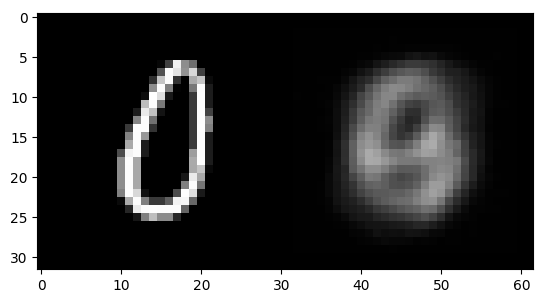

Epoch: 271/400 	 Mean Square Error Loss: 0.04858395811170339
Epoch: 272/400 	 Mean Square Error Loss: 0.0487735640257597
Epoch: 273/400 	 Mean Square Error Loss: 0.04892544113099575
Epoch: 274/400 	 Mean Square Error Loss: 0.04906433423360189
Epoch: 275/400 	 Mean Square Error Loss: 0.04899111619840066


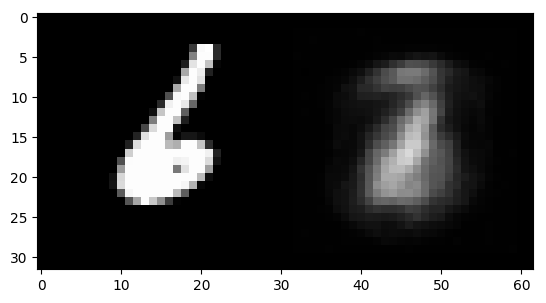

Epoch: 276/400 	 Mean Square Error Loss: 0.0489004452402393
Epoch: 277/400 	 Mean Square Error Loss: 0.04872758233298858
Epoch: 278/400 	 Mean Square Error Loss: 0.0486730615918835
Epoch: 279/400 	 Mean Square Error Loss: 0.04867633295555909
Epoch: 280/400 	 Mean Square Error Loss: 0.04880358458807071


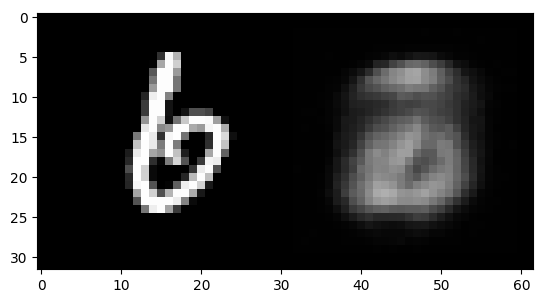

Epoch: 281/400 	 Mean Square Error Loss: 0.048925728040436905
Epoch: 282/400 	 Mean Square Error Loss: 0.04920299109071493
Epoch: 283/400 	 Mean Square Error Loss: 0.04943984548250834
Epoch: 284/400 	 Mean Square Error Loss: 0.049370588796834154
Epoch: 285/400 	 Mean Square Error Loss: 0.04920139921208223


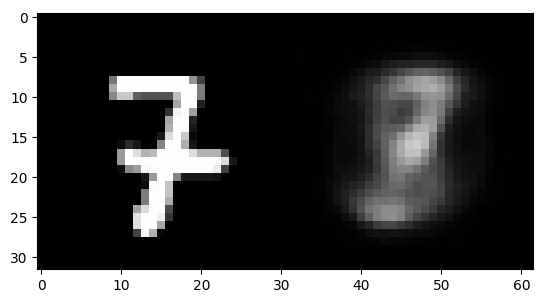

Epoch: 286/400 	 Mean Square Error Loss: 0.049065596982836725
Epoch: 287/400 	 Mean Square Error Loss: 0.04875503492852052
Epoch: 288/400 	 Mean Square Error Loss: 0.048781710055967174
Epoch: 289/400 	 Mean Square Error Loss: 0.04890798808385929
Epoch: 290/400 	 Mean Square Error Loss: 0.04913999810814858


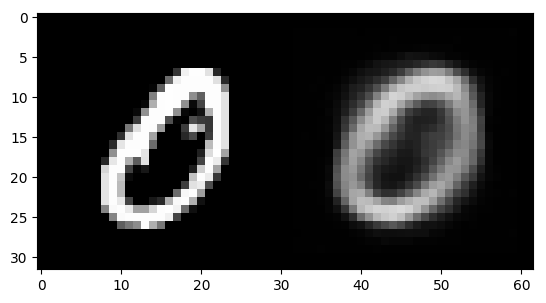

Epoch: 291/400 	 Mean Square Error Loss: 0.04900540759166082
Epoch: 292/400 	 Mean Square Error Loss: 0.04882512924571832
Epoch: 293/400 	 Mean Square Error Loss: 0.048770158924162386
Epoch: 294/400 	 Mean Square Error Loss: 0.04886065976073344
Epoch: 295/400 	 Mean Square Error Loss: 0.048918416971961656


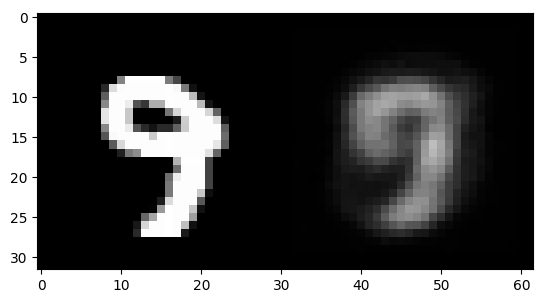

Epoch: 296/400 	 Mean Square Error Loss: 0.048932528433700405
Epoch: 297/400 	 Mean Square Error Loss: 0.04888625511278709
Epoch: 298/400 	 Mean Square Error Loss: 0.04901235960423946
Epoch: 299/400 	 Mean Square Error Loss: 0.049023905458549656
Epoch: 300/400 	 Mean Square Error Loss: 0.04885688411692778


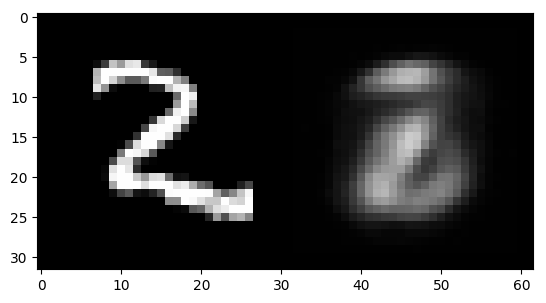

Epoch: 301/400 	 Mean Square Error Loss: 0.04883232638239861
Epoch: 302/400 	 Mean Square Error Loss: 0.04868824196358522
Epoch: 303/400 	 Mean Square Error Loss: 0.048625129647552966
Epoch: 304/400 	 Mean Square Error Loss: 0.048631859694918
Epoch: 305/400 	 Mean Square Error Loss: 0.04881944749504328


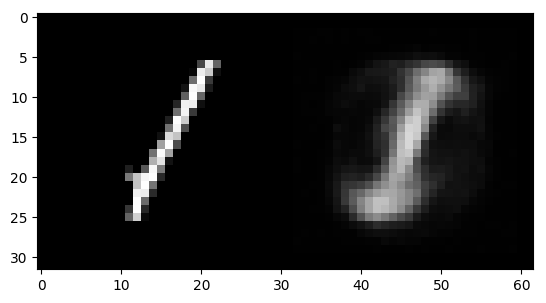

Epoch: 306/400 	 Mean Square Error Loss: 0.049030234850943086
Epoch: 307/400 	 Mean Square Error Loss: 0.04919614363461733
Epoch: 308/400 	 Mean Square Error Loss: 0.04931817762553692
Epoch: 309/400 	 Mean Square Error Loss: 0.04938855816920598
Epoch: 310/400 	 Mean Square Error Loss: 0.04925114096452792


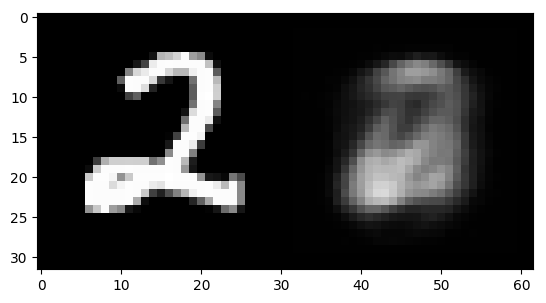

Epoch: 311/400 	 Mean Square Error Loss: 0.0493676757439971
Epoch: 312/400 	 Mean Square Error Loss: 0.049522997625172135
Epoch: 313/400 	 Mean Square Error Loss: 0.049489782315989335
Epoch: 314/400 	 Mean Square Error Loss: 0.04947027619928122
Epoch: 315/400 	 Mean Square Error Loss: 0.04974643687407176


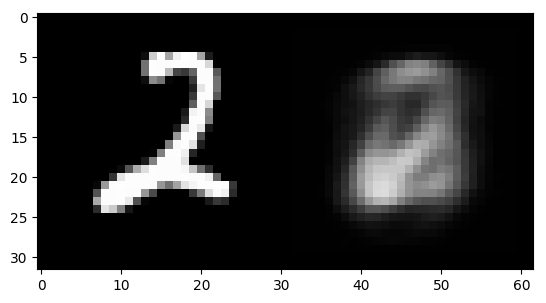

Epoch: 316/400 	 Mean Square Error Loss: 0.05003362049659093
Epoch: 317/400 	 Mean Square Error Loss: 0.05016532478233179
Epoch: 318/400 	 Mean Square Error Loss: 0.05028761283804973
Epoch: 319/400 	 Mean Square Error Loss: 0.0502966532483697
Epoch: 320/400 	 Mean Square Error Loss: 0.050276656076312064


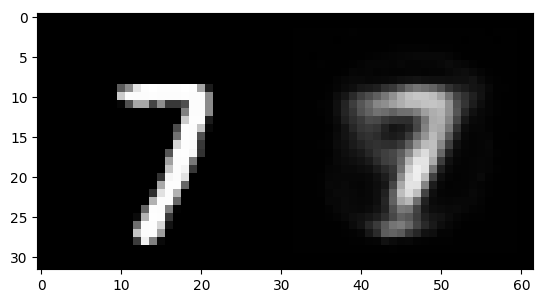

Epoch: 321/400 	 Mean Square Error Loss: 0.05030067327121893
Epoch: 322/400 	 Mean Square Error Loss: 0.050260962545871736
Epoch: 323/400 	 Mean Square Error Loss: 0.05036815082033475
Epoch: 324/400 	 Mean Square Error Loss: 0.050236562204857664
Epoch: 325/400 	 Mean Square Error Loss: 0.050135587031642594


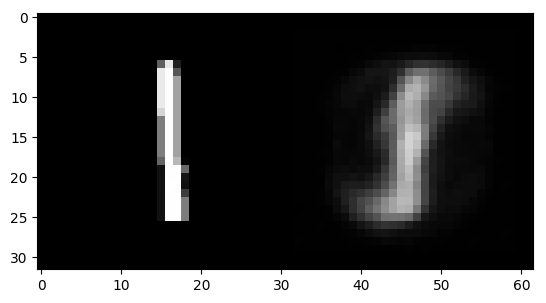

Epoch: 326/400 	 Mean Square Error Loss: 0.05011563015480836
Epoch: 327/400 	 Mean Square Error Loss: 0.05023442395031452
Epoch: 328/400 	 Mean Square Error Loss: 0.05033907424658537
Epoch: 329/400 	 Mean Square Error Loss: 0.05009399993966023
Epoch: 330/400 	 Mean Square Error Loss: 0.0500125477090478


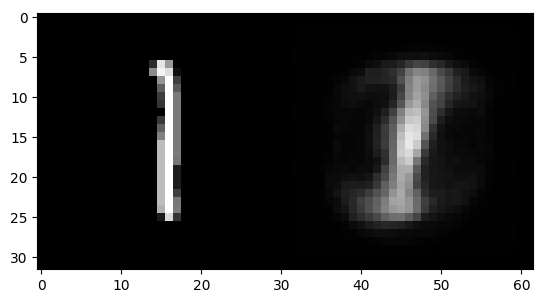

Epoch: 331/400 	 Mean Square Error Loss: 0.05019813509037097
Epoch: 332/400 	 Mean Square Error Loss: 0.05023655754824479
Epoch: 333/400 	 Mean Square Error Loss: 0.050101576186716554
Epoch: 334/400 	 Mean Square Error Loss: 0.049978786458571754
Epoch: 335/400 	 Mean Square Error Loss: 0.04994703450550635


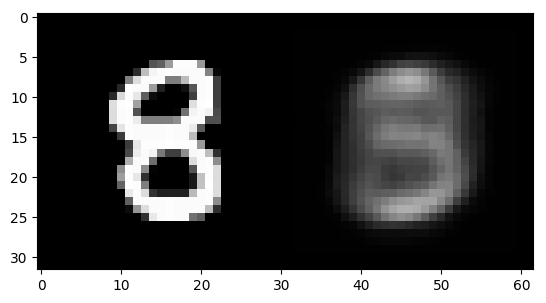

Epoch: 336/400 	 Mean Square Error Loss: 0.04988877748449643
Epoch: 337/400 	 Mean Square Error Loss: 0.0500688536092639
Epoch: 338/400 	 Mean Square Error Loss: 0.05003282173226277
Epoch: 339/400 	 Mean Square Error Loss: 0.049952797777950766
Epoch: 340/400 	 Mean Square Error Loss: 0.04946567664543788


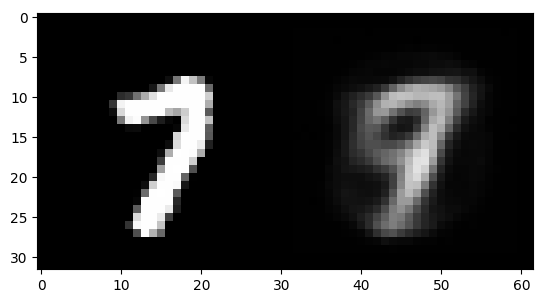

Epoch: 341/400 	 Mean Square Error Loss: 0.04901933620373408
Epoch: 342/400 	 Mean Square Error Loss: 0.04921471557269494
Epoch: 343/400 	 Mean Square Error Loss: 0.04976083965351184
Epoch: 344/400 	 Mean Square Error Loss: 0.04982543407628934
Epoch: 345/400 	 Mean Square Error Loss: 0.049854884917537375


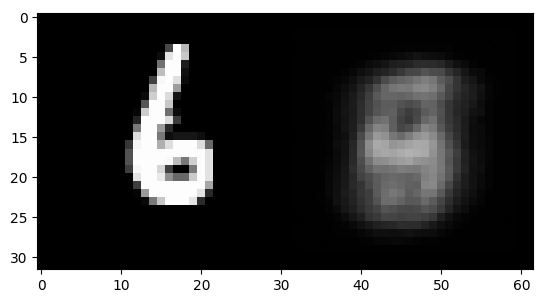

Epoch: 346/400 	 Mean Square Error Loss: 0.049740298216541606
Epoch: 347/400 	 Mean Square Error Loss: 0.04964914061129093
Epoch: 348/400 	 Mean Square Error Loss: 0.04978830683976412
Epoch: 349/400 	 Mean Square Error Loss: 0.0500849944849809
Epoch: 350/400 	 Mean Square Error Loss: 0.050011186053355534


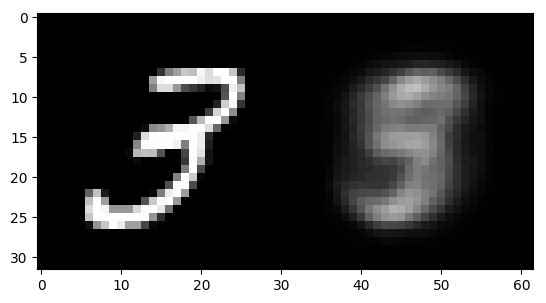

Epoch: 351/400 	 Mean Square Error Loss: 0.050067440855006376
Epoch: 352/400 	 Mean Square Error Loss: 0.0500318147862951
Epoch: 353/400 	 Mean Square Error Loss: 0.04980496192971865
Epoch: 354/400 	 Mean Square Error Loss: 0.049698647732535996
Epoch: 355/400 	 Mean Square Error Loss: 0.04996113454302152


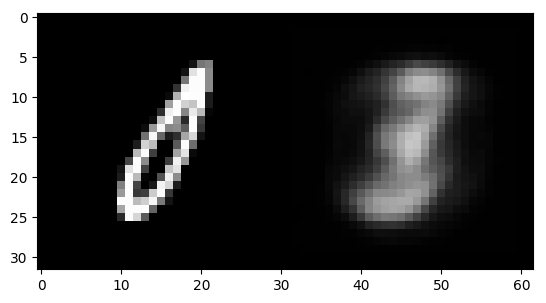

Epoch: 356/400 	 Mean Square Error Loss: 0.04989756345748901
Epoch: 357/400 	 Mean Square Error Loss: 0.04989397507160902
Epoch: 358/400 	 Mean Square Error Loss: 0.05014596146841844
Epoch: 359/400 	 Mean Square Error Loss: 0.05027854833751917
Epoch: 360/400 	 Mean Square Error Loss: 0.050436022753516836


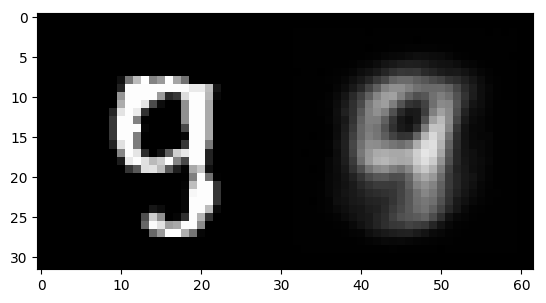

Epoch: 361/400 	 Mean Square Error Loss: 0.05029794499278069
Epoch: 362/400 	 Mean Square Error Loss: 0.05029980968683958
Epoch: 363/400 	 Mean Square Error Loss: 0.050171275188525516
Epoch: 364/400 	 Mean Square Error Loss: 0.050330867804586885
Epoch: 365/400 	 Mean Square Error Loss: 0.050186514295637606


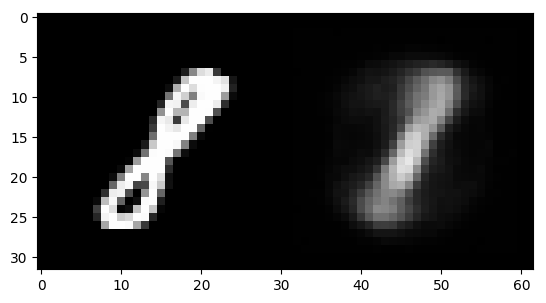

Epoch: 366/400 	 Mean Square Error Loss: 0.05006650698681672
Epoch: 367/400 	 Mean Square Error Loss: 0.05020926805833976
Epoch: 368/400 	 Mean Square Error Loss: 0.050157373088101545
Epoch: 369/400 	 Mean Square Error Loss: 0.0497552115470171
Epoch: 370/400 	 Mean Square Error Loss: 0.04969250975797574


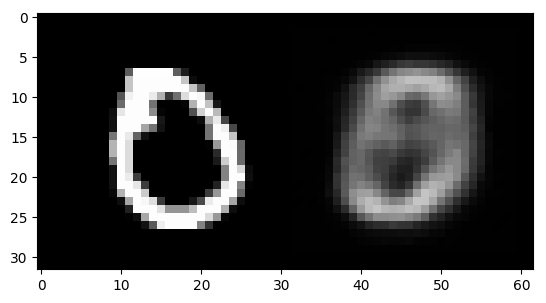

Epoch: 371/400 	 Mean Square Error Loss: 0.04972199760377407
Epoch: 372/400 	 Mean Square Error Loss: 0.04935328848659992
Epoch: 373/400 	 Mean Square Error Loss: 0.04917425128320853
Epoch: 374/400 	 Mean Square Error Loss: 0.049012695190807185
Epoch: 375/400 	 Mean Square Error Loss: 0.04898744051655134


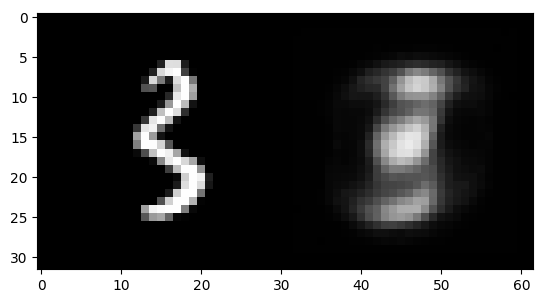

Epoch: 376/400 	 Mean Square Error Loss: 0.04889506145069997
Epoch: 377/400 	 Mean Square Error Loss: 0.04881405706206957
Epoch: 378/400 	 Mean Square Error Loss: 0.04874940291047096
Epoch: 379/400 	 Mean Square Error Loss: 0.04860035094122092
Epoch: 380/400 	 Mean Square Error Loss: 0.04845912369589011


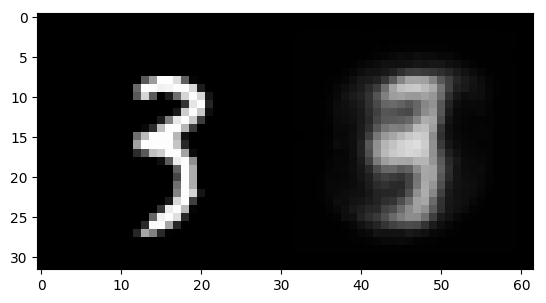

Epoch: 381/400 	 Mean Square Error Loss: 0.048372368700802325
Epoch: 382/400 	 Mean Square Error Loss: 0.04838332900156577
Epoch: 383/400 	 Mean Square Error Loss: 0.04833347331732511
Epoch: 384/400 	 Mean Square Error Loss: 0.048448714738090835
Epoch: 385/400 	 Mean Square Error Loss: 0.048292674124240875


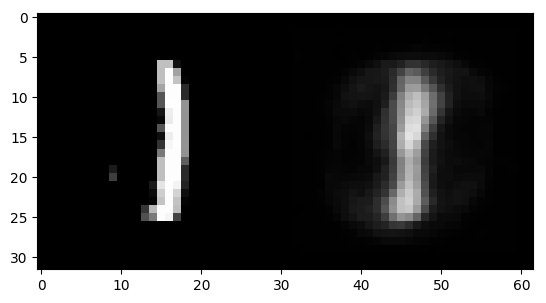

Epoch: 386/400 	 Mean Square Error Loss: 0.048346396846075855
Epoch: 387/400 	 Mean Square Error Loss: 0.048462439825137454
Epoch: 388/400 	 Mean Square Error Loss: 0.0485536145667235
Epoch: 389/400 	 Mean Square Error Loss: 0.04841029488792022
Epoch: 390/400 	 Mean Square Error Loss: 0.04820863294104735


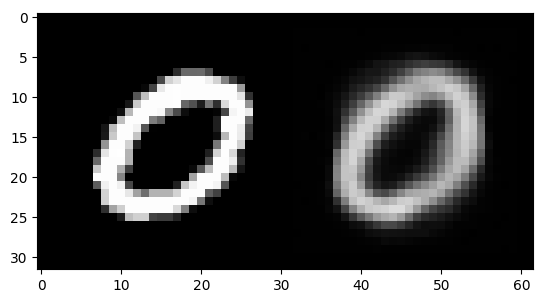

Epoch: 391/400 	 Mean Square Error Loss: 0.04810784986863534
Epoch: 392/400 	 Mean Square Error Loss: 0.04800647652397553
Epoch: 393/400 	 Mean Square Error Loss: 0.047920161485672
Epoch: 394/400 	 Mean Square Error Loss: 0.047845342693229514
Epoch: 395/400 	 Mean Square Error Loss: 0.0478029773881038


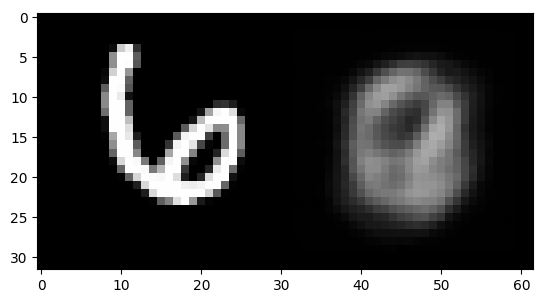

Epoch: 396/400 	 Mean Square Error Loss: 0.047985402246316276
Epoch: 397/400 	 Mean Square Error Loss: 0.04792988523840904
Epoch: 398/400 	 Mean Square Error Loss: 0.048086063998440905
Epoch: 399/400 	 Mean Square Error Loss: 0.0480841347326835
Epoch: 400/400 	 Mean Square Error Loss: 0.04802342976133029



In [8]:
epochs = 400
for epoch in tqdm_notebook(range(epochs)):
  runningloss = 0
  
  for images, labels in trainloader:
    if GPU:
      images, labels = Variable(images.view(-1, 28*28)).cuda(), Variable(labels).cuda()
      
    net.zero_grad()  # zeroes the gradient buffers of all parameters
    outputs = net(images) # forward 
    loss = criterion(outputs, images) # calculate loss
    loss.backward() #  backpropagate the loss
    
    for f in net.parameters():
      f.data.sub_(f.grad.data * lr) # weight = weight - learning_rate * gradient (Update Weights)
    
    runningloss += loss.item()
    
  if epoch % 5 == 0:
    imshow(torchvision.utils.make_grid(torch.cat((images[0].view(28, 28).unsqueeze(0).unsqueeze(0), outputs[0].view(28, 28).unsqueeze(0).unsqueeze(0)), dim=0)))
   
  print('Epoch: {}/{} \t Mean Square Error Loss: {}'.format(epoch+1, epochs, runningloss/len(trainloader)))

# Encoder Weight Visualization

In [0]:
trained_weightsE = copy.deepcopy(net.encoder[0].weight.data)
d_weightsE = init_weightsE - trained_weightsE

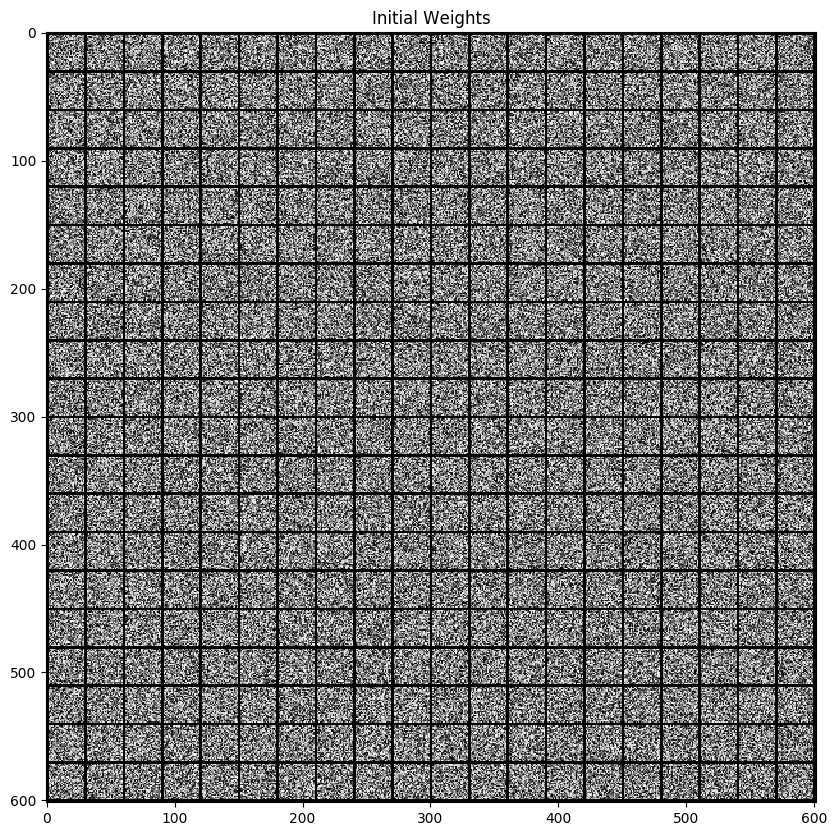

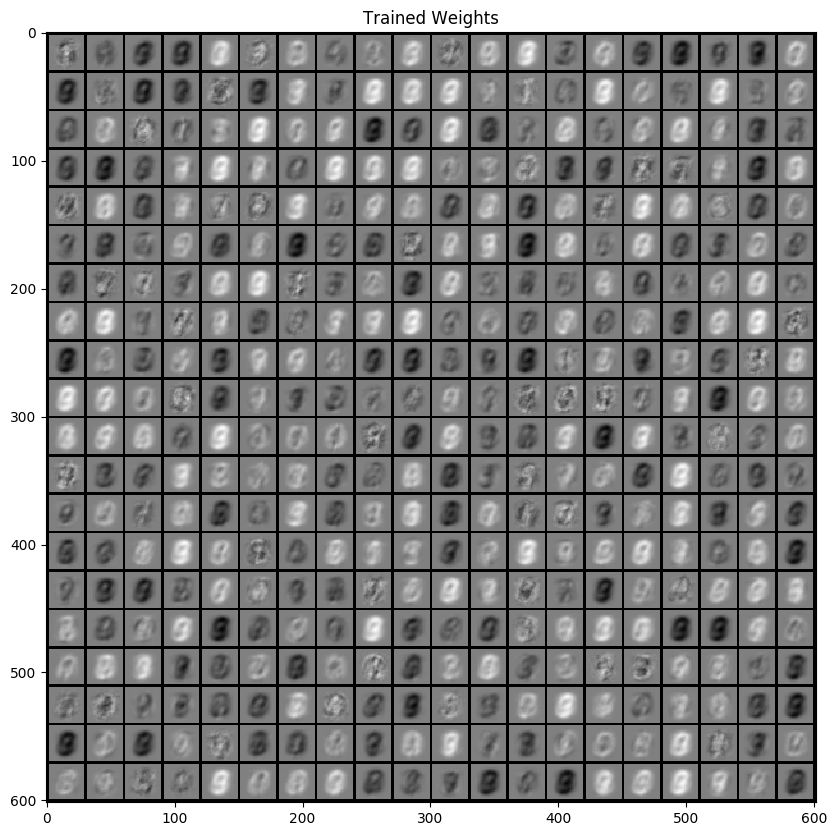

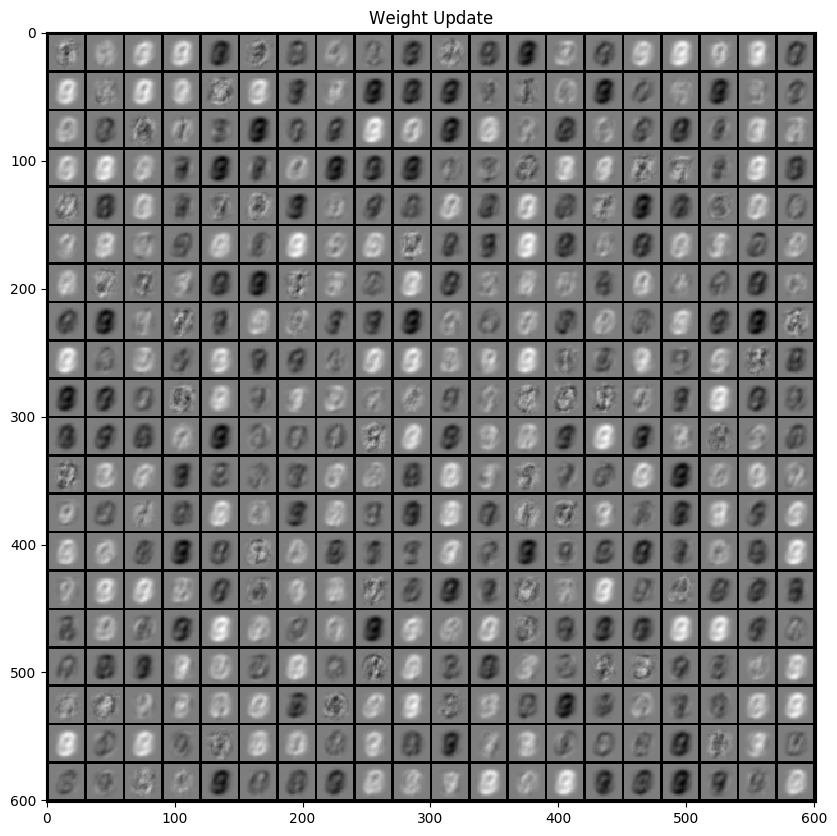

In [10]:
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(init_weightsE.view(400, 1, 28, 28), nrow=20, normalize=True), 'Initial Weights')
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(trained_weightsE.view(400, 1, 28, 28), nrow=20, normalize=True), 'Trained Weights')
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(d_weightsE.view(400, 1, 28, 28), nrow=20, normalize=True), 'Weight Update')

# Decoder Weight Visualization

In [0]:
trained_weightsD = copy.deepcopy(net.decoder[0].weight.data)
d_weightsD = init_weightsD - trained_weightsD

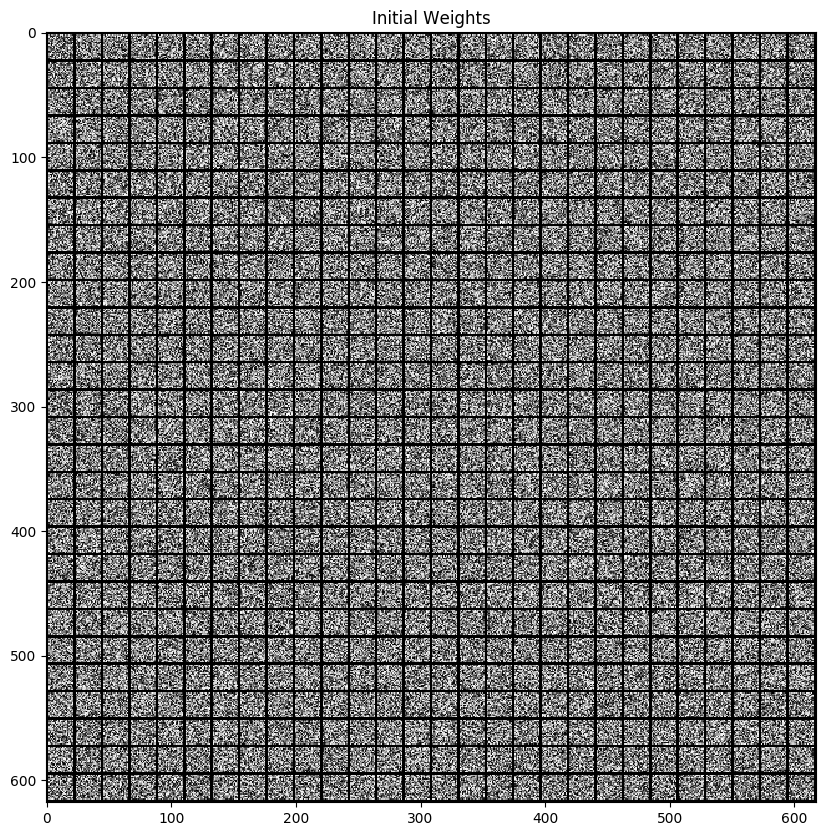

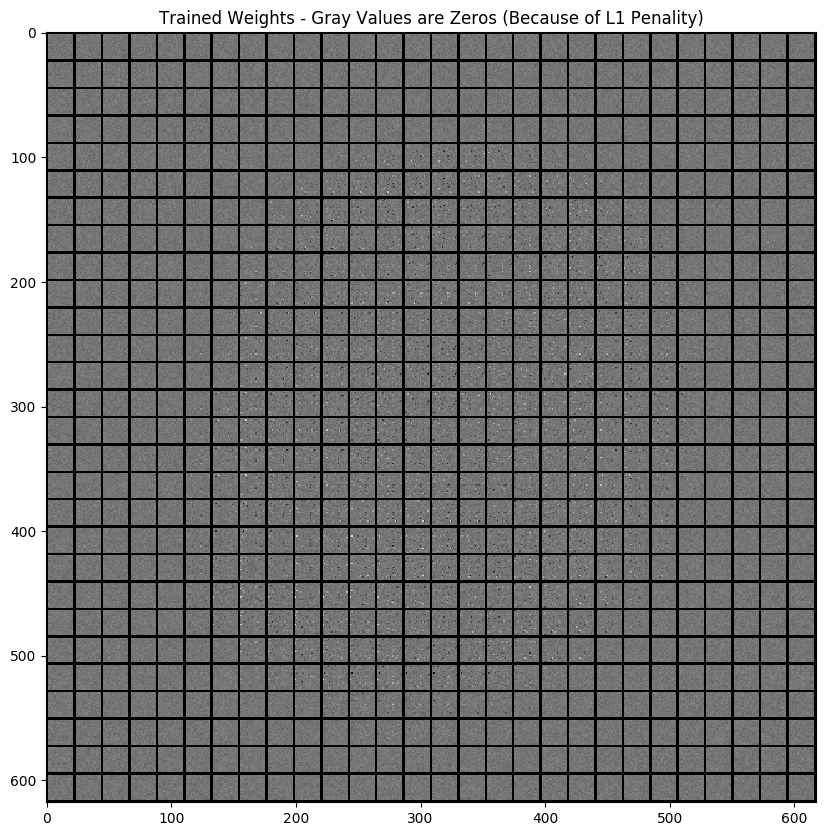

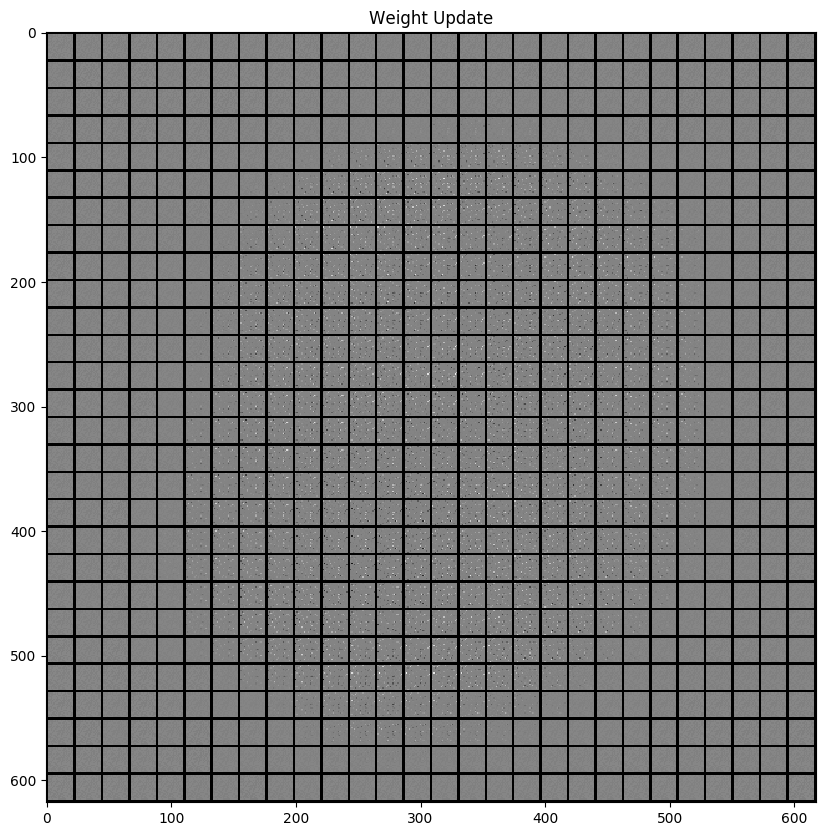

In [12]:
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(init_weightsD.view(784, 1, 20, 20), nrow=28, normalize=True), 'Initial Weights')
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(trained_weightsD.view(784, 1, 20, 20), nrow=28, normalize=True), 'Trained Weights - Gray Values are Zeros (Because of L1 Penality)')
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(d_weightsD.view(784, 1, 20, 20), nrow=28, normalize=True), 'Weight Update')

# Training as Classifier

In [13]:
new_classifier = nn.Sequential(*list(net.children())[:-1])
net = new_classifier
net.add_module('classifier', nn.Sequential(nn.Linear(400, 10),
                                          nn.LogSoftmax(dim=1)))

print(net)
if GPU:
  net = net.cuda()

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=10, bias=True)
    (1): LogSoftmax()
  )
)


In [0]:
criterion = nn.NLLLoss()
lr = 0.01

In [15]:
epochs = 100

for epoch in tqdm_notebook(range(epochs)):
  runningloss = 0
  
  for images, labels in trainloader:
    net.train()
    if GPU:
      images, labels = Variable(images.view(-1, 28*28)).cuda(), Variable(labels).cuda()
    
    net.zero_grad()  # zeroes the gradient buffers of all parameters
    outputs = net(images) # forward 
    loss = criterion(outputs, labels) # calculate loss
    loss.backward() #  backpropagate the loss
    for f in net.parameters():
      f.data.sub_(f.grad.data * lr) # weight = weight - learning_rate * gradient (Update Weights)
    runningloss += loss.item()
    
  else:
    net.eval()
    correct = 0
    with torch.no_grad():
      for data in testloader:
        inputs, labels = data
        if GPU:
          images, labels = Variable(inputs.view(-1, 28*28)).cuda(), labels.cuda()
        else:
          images, labels = Variable(inputs.view(-1, 28*28)), labels
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        correct += torch.sum(predicted==labels).item()
    accuracy = correct / len(testloader.dataset)
  print('At Iteration : %d / %d  ;  Train Error : %f ;Test Accuracy : %f'%(epoch+1, epochs, runningloss/len(testloader), accuracy))
print('Finished Training')


At Iteration : 1 / 100  ;  Train Error : 12.596479 ;Test Accuracy : 0.466700
At Iteration : 2 / 100  ;  Train Error : 10.742244 ;Test Accuracy : 0.568600
At Iteration : 3 / 100  ;  Train Error : 9.645103 ;Test Accuracy : 0.581400
At Iteration : 4 / 100  ;  Train Error : 8.929772 ;Test Accuracy : 0.605200
At Iteration : 5 / 100  ;  Train Error : 8.421016 ;Test Accuracy : 0.630400
At Iteration : 6 / 100  ;  Train Error : 8.037848 ;Test Accuracy : 0.634500
At Iteration : 7 / 100  ;  Train Error : 7.738763 ;Test Accuracy : 0.648700
At Iteration : 8 / 100  ;  Train Error : 7.496501 ;Test Accuracy : 0.646500
At Iteration : 9 / 100  ;  Train Error : 7.296903 ;Test Accuracy : 0.649800
At Iteration : 10 / 100  ;  Train Error : 7.127703 ;Test Accuracy : 0.663500
At Iteration : 11 / 100  ;  Train Error : 6.983378 ;Test Accuracy : 0.665600
At Iteration : 12 / 100  ;  Train Error : 6.858412 ;Test Accuracy : 0.666600
At Iteration : 13 / 100  ;  Train Error : 6.749657 ;Test Accuracy : 0.670900
At Ite

# Testing Performance

In [16]:
classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

class_correct = np.array([0.] * 10)
class_total = np.array([0.] * 10)
for data in testloader:
    images, labels = data
    if GPU:
        outputs = net(Variable(images.view(-1, 28*28).cuda()))
        _, predicted = torch.max(outputs.cpu(), 1)
    else:
        outputs = net(Variable(images.view(-1, 28*28)))
        _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(bs):
        label = labels[i].item()
        class_correct[label] += c[i].item()
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %f %%' % (classes[i], 100 * class_correct[i] / float(class_total[i])))

Accuracy of  zero : 86.836735 %
Accuracy of   one : 96.299559 %
Accuracy of   two : 70.155039 %
Accuracy of three : 72.970297 %
Accuracy of  four : 63.034623 %
Accuracy of  five : 57.399103 %
Accuracy of   six : 65.657620 %
Accuracy of seven : 79.961089 %
Accuracy of eight : 67.967146 %
Accuracy of  nine : 49.355798 %
